# [nome equipa] - A minha nota (Kaggle)

## João Ferreira - 21905985; Paulo Pinto - 21906966

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint as r


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time

In [2]:
notas_df = pd.read_csv("data/student_data.csv")

worth noting:

    - school (GP ≳ 2 que MS) sns.barplot(data=notas_df, x="school", y="grade").set_title("graph")
    - absences -> sns.lineplot(data=notas_df, y="absences",x="grade").set_title("graph")

Text(0.5, 1.0, 'graph')

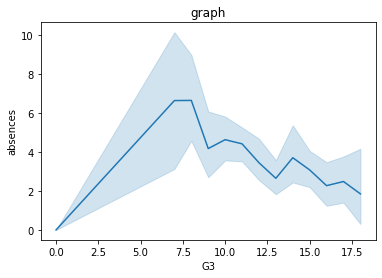

In [3]:
sns.lineplot(data=notas_df, y="absences",x="G3").set_title("graph")

In [4]:
notas_df["absences"].describe()

count    545.000000
mean       3.702752
std        4.562847
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

In [9]:
# creating an object of LinearRegression class
LR = LinearRegression()

def predict():
    notas_df = pd.read_csv("data/student_data.csv")
    notas = notas_df.drop("G3", axis=1)

    rand = r(999999999)
    # splitting the data
    features_train, features_test, target_train, target_test = \
    train_test_split(notas, notas_df['G3'], test_size = 0.05, random_state=rand)

    # fitting the training data
    LR.fit(features_train, target_train)
    prediction = LR.predict(features_test)
 
    # print(f'RMSE - {(rmse := np.sqrt(mean_squared_error(target_test, prediction))): .4f} for {rand}')
    rmse = np.sqrt(mean_squared_error(target_test, prediction))
    test_df = pd.read_csv("data/test_data.csv")
    return rmse, LR.predict(test_df)

In [6]:
predictions = []

for x in range(1000):
    predictions.append(predict())
# print(l)
predictions.sort(key=lambda x: x[0])
predictions = predictions[:25]
print(predictions)

473621272
203594181
451467494
686652977
331723617
297301346
962614241
263557659
962793941
280646158
542247162
52399988
524894190
674459186
778433021
809677255
357114360
834842371
424160937
160678938
28230408
483414102
797642221
878254617
309699694
186331263
50483640
444890716
387696330
648948279
825736176
250603422
200090190
811129616
838244738
481532066
743810646
537264211
764067563
475253628
682782714
125957060
867768816
315327295
333641129
282398470
34713870
35201817
999562912
101850069
542248715
571173892
916871914
241171594
184903914
168104524
664689769
155179521
142794223
196163070
383329178
150330149
619116747
640326831
991388438
747535539
22732579
518703083
194647947
742867650
282631547
22176927
527945550
98947237
605275396
814004712
481755109
393150345
421055362
10624236
460911374
597417753
522221935
189999191
626616891
253325072
498867841
244803458
634132386
152493357
333299991
255713967
771486621
93952708
201494711
730479426
425667930
839774010
923605178
487508161
184811707


In [15]:
# reversed(l)

avg_list = []

for r, pred in predictions:
    # print(r)
    avg_list.append(pred)

print(sum(avg_list)/len(avg_list))

[13.65434334 14.20246998 12.52446786 11.58140233 13.17086408 12.1684216
 12.47009278 13.47572644 13.41744381 12.84547474  9.57107439 12.92528061
 12.66975483 12.84802985 11.8136009   9.55608501 13.6997817  10.01004133
 10.56513219  8.15715211 12.94138735 14.00527547 12.7897129  12.99489664
 13.37538979  9.00712233 12.6945511  14.14103049 14.09238557  8.37378252
 12.01394368  9.27041429 11.73985274  9.48702575 13.21202533 11.5297201
 14.36484216 11.71225256  9.60781961 10.66262062 14.40325831 13.68525847
 14.51849497  9.47108804  7.21863301 11.82134234 12.13782128 11.93006355
 12.08084802 13.65372936 12.18563348 10.3189327   9.12178306 12.78584009
 13.48003211 14.5935227  11.38643466 12.63554558 10.37322442 13.68726044
 11.26042662 12.84408979 11.89614128 10.95920786 14.12441163  7.67517144
 13.85144581 13.94178974 12.08126342 10.21090889  9.89108253  4.4353442
 12.33513433 10.54452358 11.69364188 13.38810755 10.64787743 14.286598
 13.68405188 12.52582684 13.8426621  10.30269432 12.2590

In [39]:
with open("avgs.txt") as fp:
    clean = []
    for lines in fp.readlines():
        for line in lines.split(" "):
            if len(line) >= 1:
                # print(f"x -> {line}")
                clean.append(line)
                pass

with open("data/prediction_avgs.csv", "w+") as fw:
    fw.write(f"index,G3\n")
    for i, n in enumerate(clean):
        fw.write(f"{i},{n}\n")

In [13]:
test_df = pd.read_csv("data/test_data.csv")
prediction = LR.predict(test_df)

with open(f"data/prediction_{time.time():.0f}.csv", "w+") as fp:
    fp.write(f"index,G3\n")
    for i, n in enumerate(prediction):
        fp.write(f"{i},{n}\n")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

r2 score is 0.22537112321825914
mean_sqrd_error is 8.497963331140085
root_mean_squared error (RMSE) of is 2.9151266406693352

TODO : PARAMETER TUNING , usar stats model ou OLS regression

- [x] ler dados
- [x] regressão linear 70% dos dados `student_data.csv`
- [ ] testar com os restantes 30%
- [ ] parameter tuning !!!
- [x] prever `test_data.csv`
- [ ] alterações
- [ ] submeter 👍

helpful links:

https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

https://datatofish.com/multiple-linear-regression-python/

https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html